In [169]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical   
import random




In [95]:
%matplotlib inline
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.layers import Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation

In [37]:
# Loading Dataset
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
print(X_train.shape)


(50000, 32, 32, 3)


In [59]:
print(X_test.shape)    ##### We have 50000 training Data and 10000 test data


(10000, 32, 32, 3)


In [58]:
y_train.shape

(50000, 1)

In [66]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [67]:
y_train = y_train.reshape(-1,)    # We dont need it in 2D so we convert to 1D (We need 1st dimension so we use -1 and to flatten it we leave empty)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [68]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


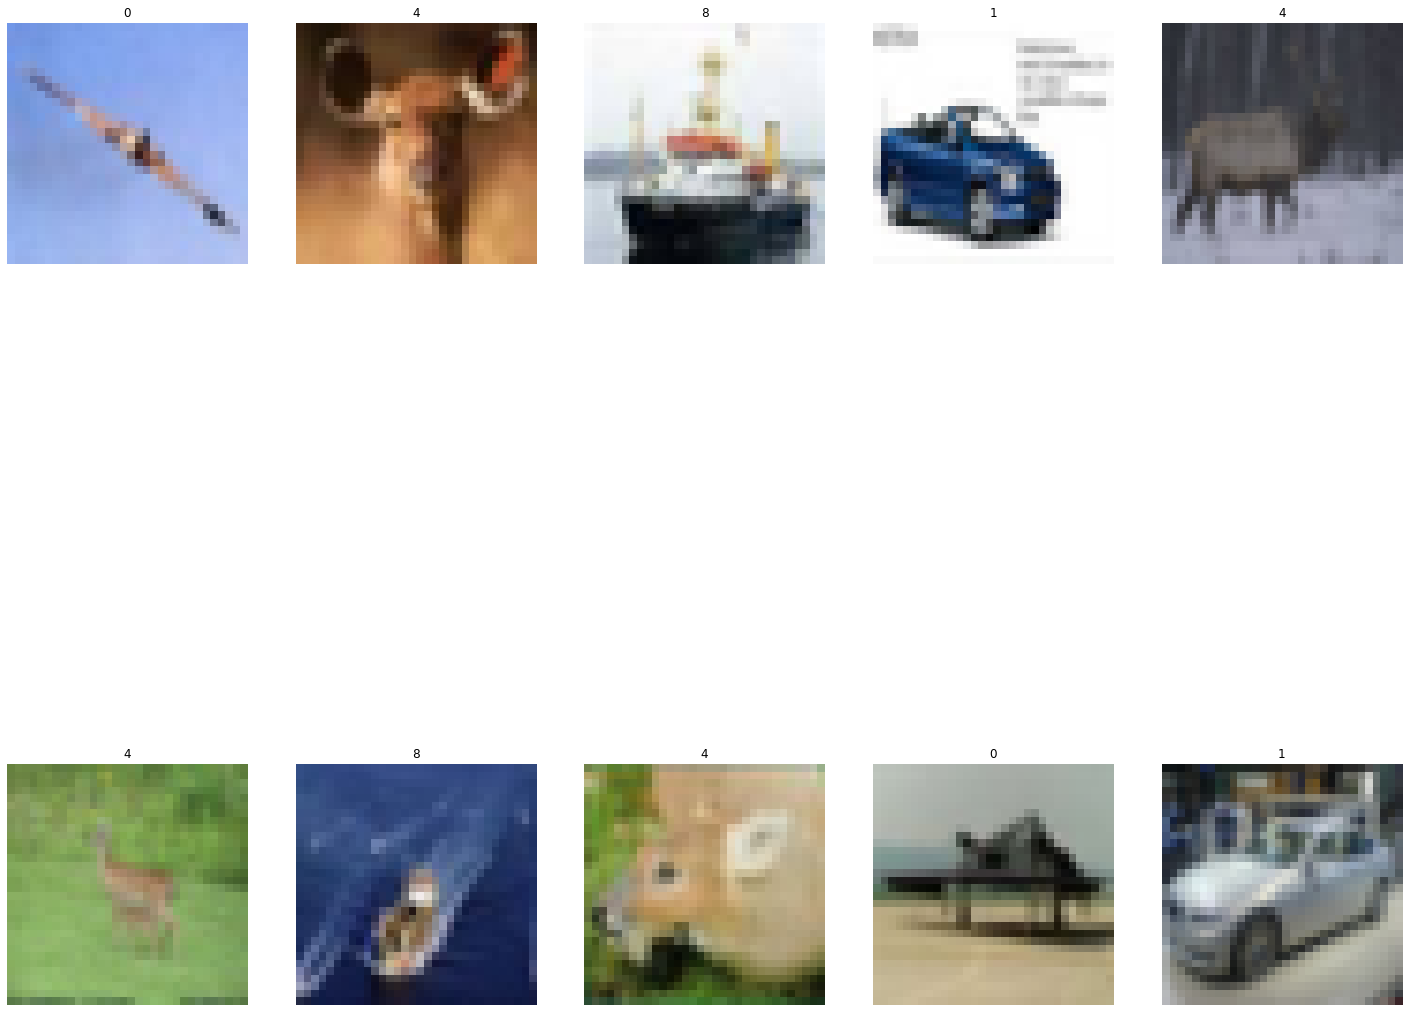

In [199]:
fig,axes = plt.subplots(2, 5, figsize=(25,25))  
axes=axes.reshape(-1)

for i in np.arange(0,2*5):   
    index=np.random.randint(0,len(X_train)) #Pick a random number 
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index]) #Prints labels on top of the picture
    axes[i].axis('off')

